In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import itertools

In [17]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Scaler Case Studies/2.Aerofit/Aerofit.csv')

# Analyze shape and info about data
print(df.shape)

print(df.info(), '\n\n')

print(df.describe(include='all'))

(180, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None 


       Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN          

# Univariate Analysis

**Univariate Categorical Analysis**

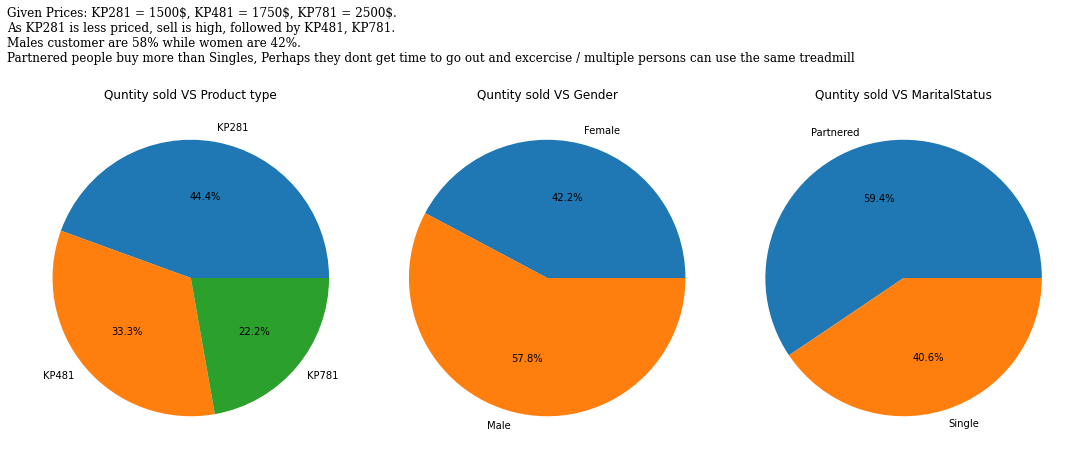

In [18]:
# Distinct types of Treadmmill
df['Product'].value_counts()

# The KP281 is an entry-level treadmill that sells for $1,500.
# The KP481 is for mid-level runners that sell for $1,750.
# The KP781 treadmill is having advanced features that sell for $2,500.


fig, ax = plt.subplots(1,3, figsize=(15,6))

new_df = df[['Product']].reset_index().groupby('Product')['index'].count().reset_index()
ax[0].pie(new_df['index'], labels=new_df['Product'], autopct='%.1f%%')

new_df = df.groupby('Gender')['Product'].count().reset_index()
ax[1].pie(new_df['Product'], labels=new_df['Gender'], autopct='%.1f%%')

new_df = df.groupby('MaritalStatus')['Product'].count().reset_index()
ax[2].pie(new_df['Product'], labels=new_df['MaritalStatus'], autopct='%.1f%%')


ax[0].set_title('Quntity sold VS Product type')
ax[1].set_title('Quntity sold VS Gender')
ax[2].set_title('Quntity sold VS MaritalStatus')

observation = '''Given Prices: KP281 = 1500$, KP481 = 1750$, KP781 = 2500$.
As KP281 is less priced, sell is high, followed by KP481, KP781.
Males customer are 58% while women are 42%.
Partnered people buy more than Singles, Perhaps they dont get time to go out and excercise / multiple persons can use the same treadmill'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')

plt.tight_layout()
plt.show()

Univariate Continous Variable Analysis

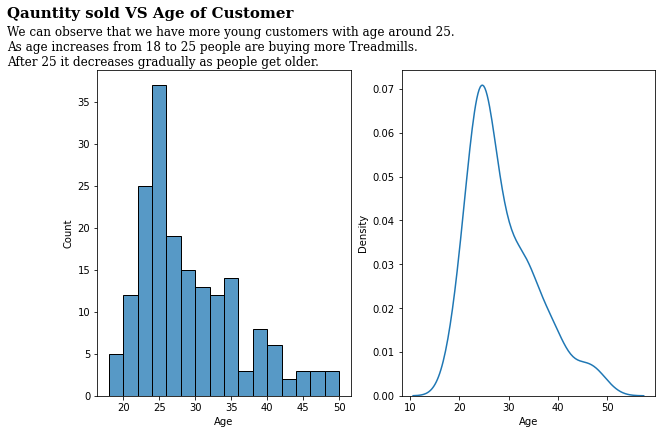

In [19]:
# Which age people prefers doing more workout 

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(data=df, x='Age', binwidth=2, ax=ax[0])
sns.kdeplot(data=df, x='Age', ax=ax[1])

fig.text(0, 1, "Qauntity sold VS Age of Customer", fontsize=15, fontweight='bold', fontfamily='serif')
observation = '''We can observe that we have more young customers with age around 25.
As age increases from 18 to 25 people are buying more Treadmills.
After 25 it decreases gradually as people get older.'''
fig.text(0, 0.89, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

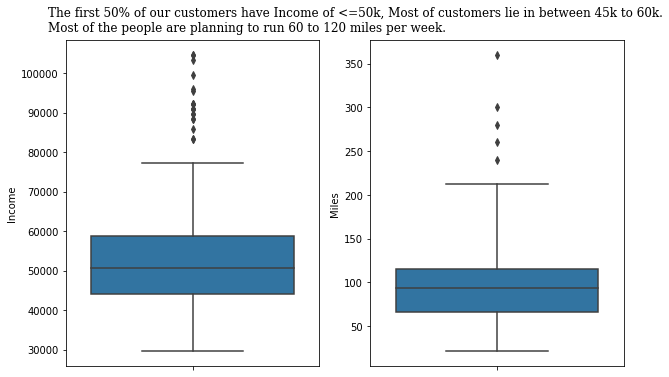

In [21]:
# Gender VS Quantity sold
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.boxplot(data=df, y='Income', ax=ax[0])
sns.boxplot(data=df, y='Miles', ax=ax[1], whis=2.5)

observation = '''The first 50% of our customers have Income of <=50k, Most of customers lie in between 45k to 60k.
Most of the people are planning to run 60 to 120 miles per week.'''
fig.text(0.1, 0.9, observation, fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

Univariate Ordinal Analysis

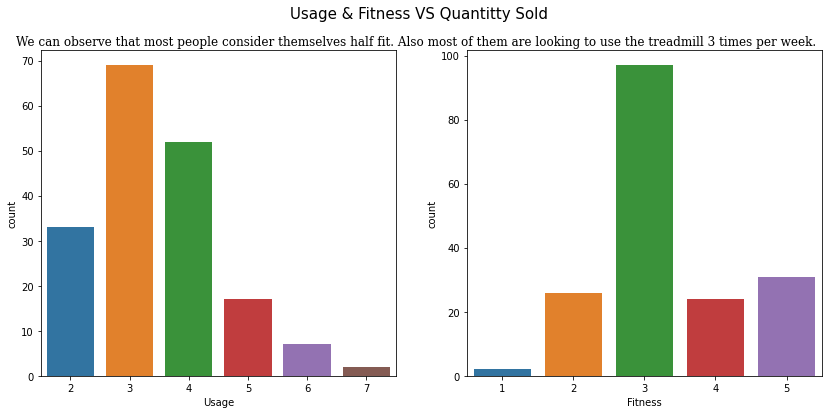

In [22]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.countplot(data=df, x='Usage', ax=ax[0])
sns.countplot(data=df, x='Fitness', ax=ax[1])

observation = '''We can observe that most people consider themselves half fit. Also most of them are looking to use the treadmill 3 times per week.'''
fig.text(0.1, 0.89, observation, fontsize=12, fontweight='light', fontfamily='serif')
fig.suptitle('Usage & Fitness VS Quantitty Sold', fontsize=15)

# plt.tight_layout()
plt.show()

# Bivariate Analysis

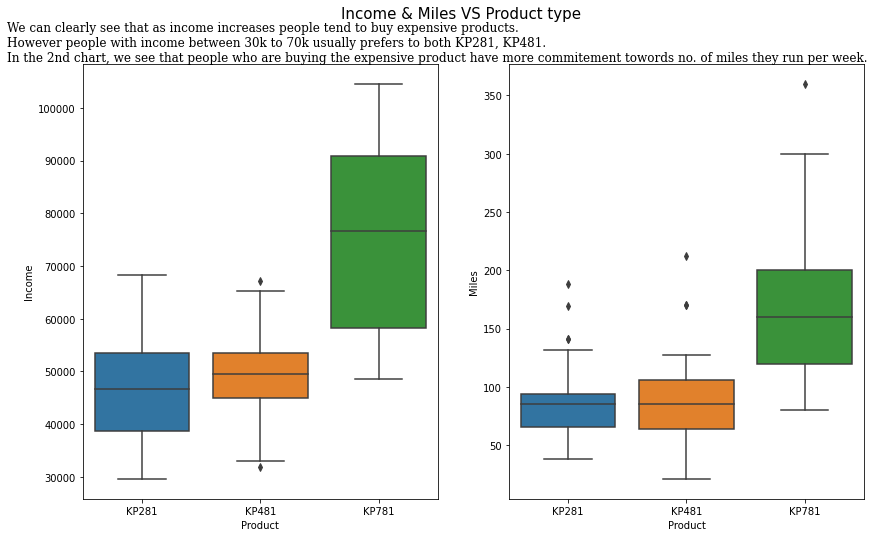

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.boxplot(data=df, y='Income', x='Product', ax=ax[0])
sns.boxplot(data=df, y='Miles', x='Product', ax=ax[1])

observation = '''We can clearly see that as income increases people tend to buy expensive products.
However people with income between 30k to 70k usually prefers to both KP281, KP481.
In the 2nd chart, we see that people who are buying the expensive product have more commitement towords no. of miles they run per week.'''
fig.text(0.05, 0.885, observation, fontsize=12, fontweight='light', fontfamily='serif')
fig.suptitle('Income & Miles VS Product type', fontsize=15)

# plt.tight_layout()
plt.show()

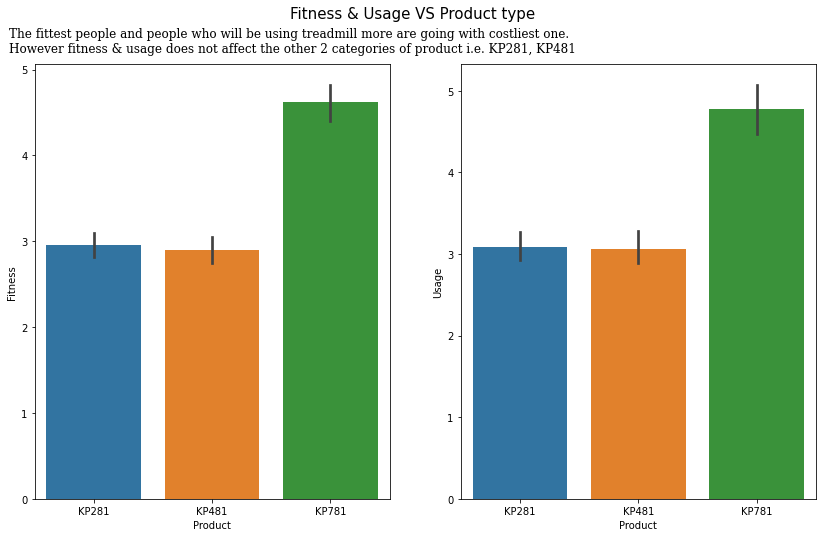

In [24]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.barplot(data=df, y='Fitness', x='Product',  ax=ax[0])
sns.barplot(data=df, y='Usage', x='Product', ax=ax[1])

observation = '''The fittest people and people who will be using treadmill more are going with costliest one.
However fitness & usage does not affect the other 2 categories of product i.e. KP281, KP481'''
fig.text(0.1, 0.9, observation, fontsize=12, fontweight='light', fontfamily='serif')
fig.suptitle('Fitness & Usage VS Product type', fontsize=15)

# plt.tight_layout()
plt.show()

# Recommend: If people are more fit or are looking to use treadmill more then ask the sales person to recommend the costliest one.
#            This way we can increase the sell of the costlier product i.e. KP781.

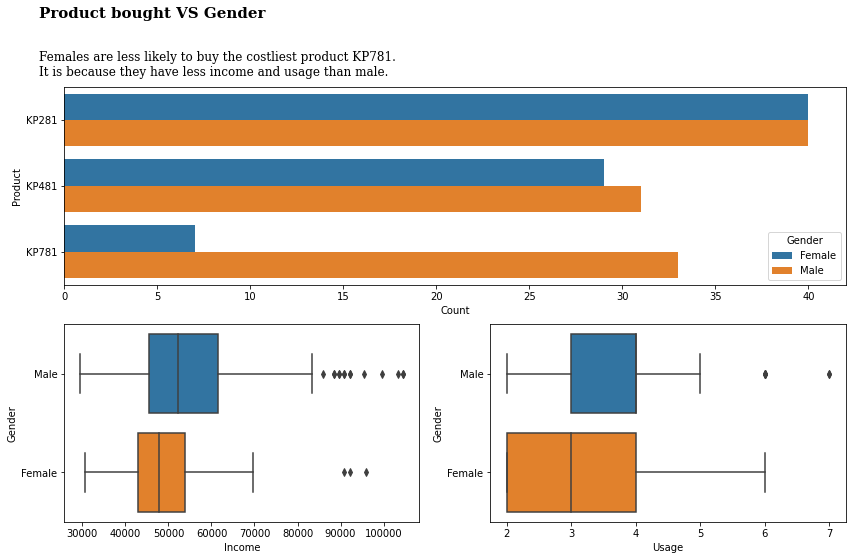

In [25]:
new_df = df.groupby(['Product', 'Gender'])['Product'].count().reset_index(name='Count')#.sort_values('Count', ascending=False)

fig = plt.figure(figsize=(14,8))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

sns.barplot(data=new_df, x='Count', y='Product', hue='Gender', ax=ax1) 
sns.boxplot(data=df, x='Income', y='Gender', ax=ax2)
sns.boxplot(data=df, x='Usage', y='Gender', ax=ax3)


fig.text(0.1, 1, 'Product bought VS Gender', fontsize=15, fontweight='bold', fontfamily='serif')
observation = '''Females are less likely to buy the costliest product KP781.
It is because they have less income and usage than male.'''
fig.text(0.1, 0.9, observation, fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

# Company should focus more on how to get females in buying the costlier product which will increase the

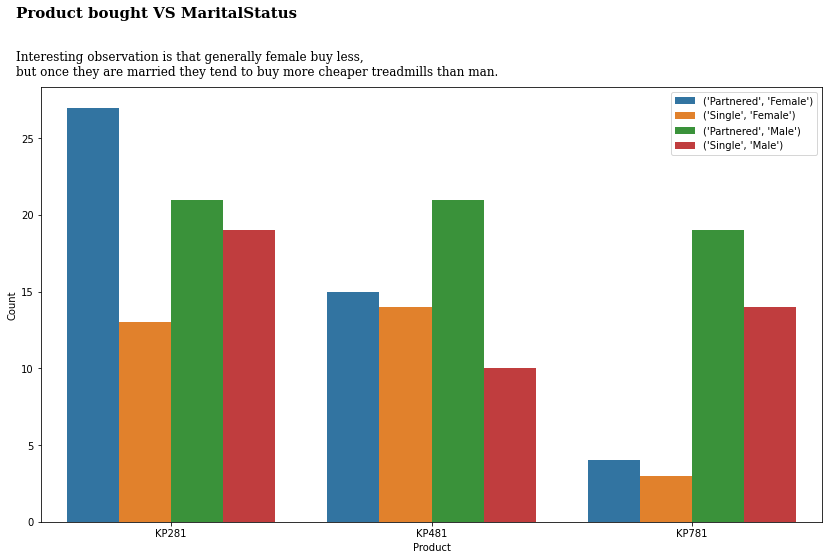

In [26]:
new_df = df.groupby(['Product', 'Gender', 'MaritalStatus'])['Product'].count().reset_index(name='Count')

fig = plt.figure(figsize=(14,8))
gs = fig.add_gridspec(1,1)
ax1 = fig.add_subplot(gs[0, :])

sns.barplot(data=new_df, y='Count', x='Product', hue=new_df[['MaritalStatus', 'Gender']].apply(tuple, axis=1), ax=ax1) 

fig.text(0.1, 1, 'Product bought VS MaritalStatus', fontsize=15, fontweight='bold', fontfamily='serif')
observation = '''Interesting observation is that generally female buy less, 
but once they are married they tend to buy more cheaper treadmills than man.'''
fig.text(0.1, 0.9, observation, fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

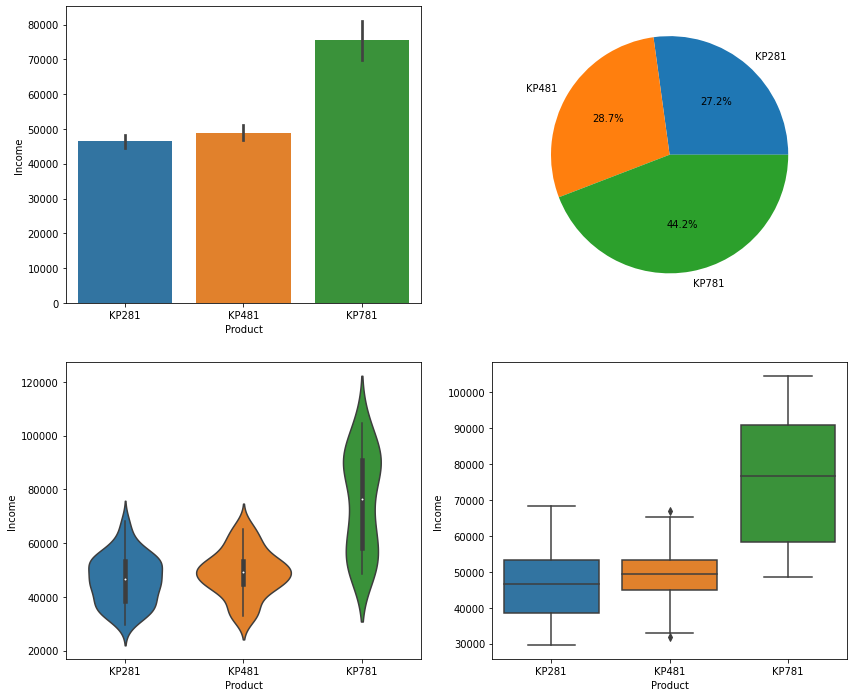

In [27]:
# For category vs numeric
x_col, y_col = 'Product', 'Income'

new_df = df[[x_col, y_col]].reset_index().groupby(x_col)[y_col].mean().reset_index()


fig, ax = plt.subplots(2,2, figsize=(14,12))
sns.barplot(data=df, x=x_col, y=y_col, ax=ax[0][0])
ax[0][1].pie(new_df[y_col], labels=new_df[x_col], autopct='%.1f%%')
sns.violinplot(data=df, x=x_col, y=y_col, ax=ax[1][0])
sns.boxplot(data=df, x=x_col, y=y_col, ax=ax[1][1])

plt.show()

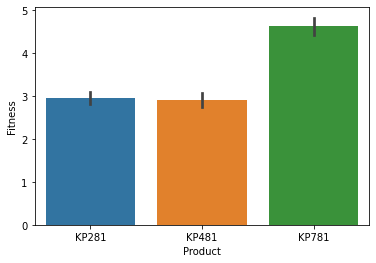

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


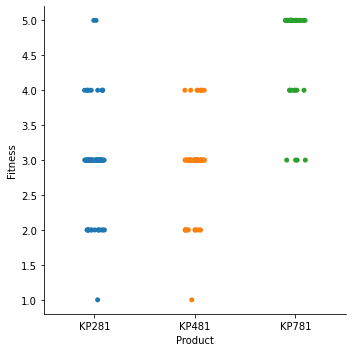

In [28]:
# For category vs category
from sklearn.preprocessing import LabelEncoder
x_col, y_col = 'Product', 'Fitness'

if df[y_col].dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(df[y_col])

if df[y_col].dtype == 'object':
    sns.barplot(data=df, x=x_col, y=y)
else:
    sns.barplot(data=df, x=x_col, y=y_col)
plt.show()


sns.catplot(data=df, x=x_col, y=y_col, ax=ax[1])
plt.show()

# MultiVariate Analysis

Income VS Age Analysis

Interesting Obeservation is that: Older people tend to buy the costliest product KP781 only when their salary is high.       But young people(22 to 25) buy the costliest product KP781 even though their salary is around 50k.


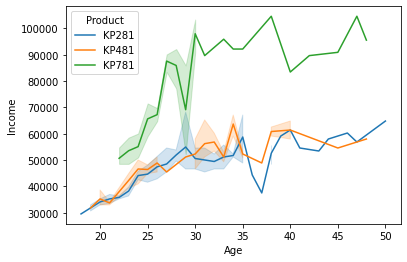





This also shows that we have more customers in the age bracket 22 to 25 and Income around 35k to 55k


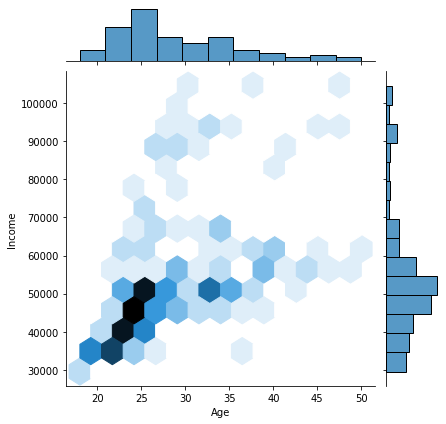

In [29]:
# Drawing this same plot with y=[Miles / ]
print('Interesting Obeservation is that: Older people tend to buy the costliest product KP781 only when their salary is high.\
       But young people(22 to 25) buy the costliest product KP781 even though their salary is around 50k.')

x_col, y_col = 'Age', 'Income'
sns.lineplot(data=df, x=x_col, y=y_col, hue='Product')
plt.show()

print('\n\n\n')
print('This also shows that we have more customers in the age bracket 22 to 25 and Income around 35k to 55k')
sns.jointplot(data=df, x=x_col, y=y_col, kind='hex')
plt.show()

Miles VS Age Analysis

We observe that people who buy the costliest product tend to run more miles


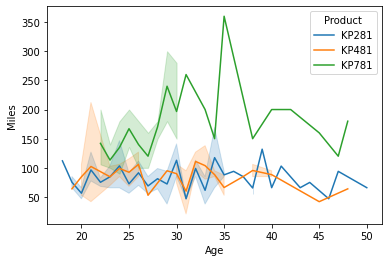




Most people are looking to run some where around 40 to 150 miles per week


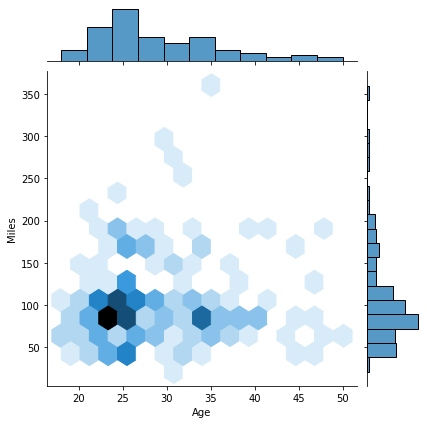

In [30]:
# Drawing this same plot with y=[Miles / ]
print('We observe that people who buy the costliest product tend to run more miles')

x_col, y_col = 'Age', 'Miles'
sns.lineplot(data=df, x=x_col, y=y_col, hue='Product')
plt.show()

print('\n\n')
print('Most people are looking to run some where around 40 to 150 miles per week')
sns.jointplot(data=df, x=x_col, y=y_col, kind='hex')
plt.show()

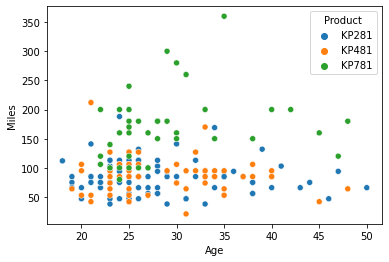

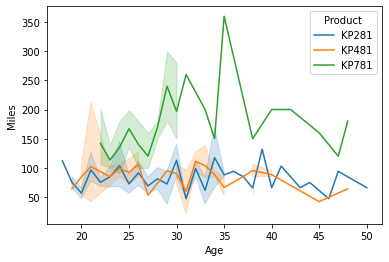

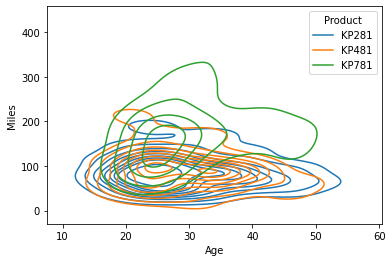

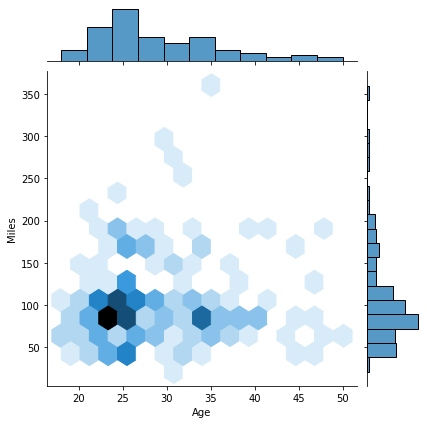

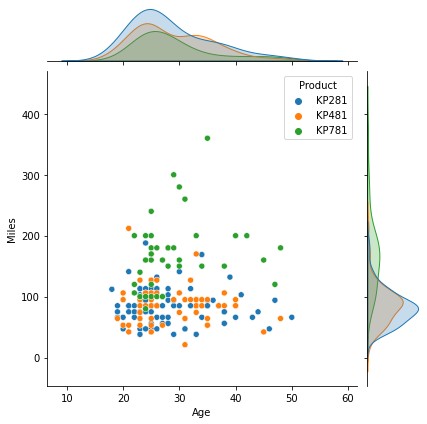

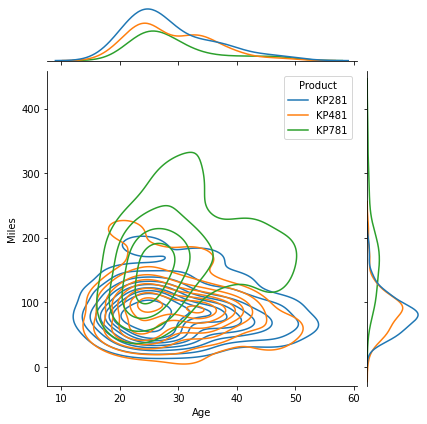

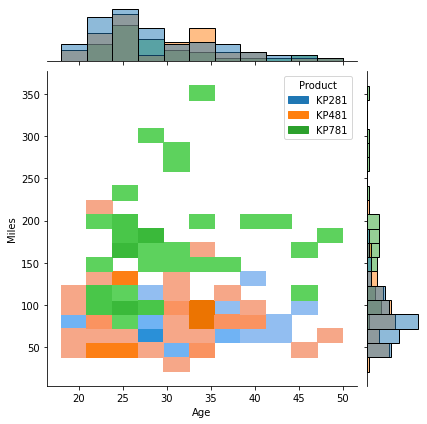

In [31]:
def func(x_col, y_col, hue, x_col_type='num', y_col_type='num'):

    if x_col_type=='num' and y_col_type=='num':
        # fig, ax = plt.subplots(2,3, figsize=(14,12))
        sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue)
        plt.show()

        sns.lineplot(data=df, x=x_col, y=y_col, hue=hue)
        plt.show()

        sns.kdeplot(data=df, x=x_col, y=y_col, hue=hue)
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, kind='hex')
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, hue=hue, kind='scatter')
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, hue=hue, kind='kde')
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, hue=hue, kind='hist')
        plt.show()

    elif x_col_type=='cat' and y_col_type=='num':
        fig, ax = plt.subplots(1,3, figsize=(14,12))


func('Age', 'Miles', 'Product')

In [32]:
---> 2D (Bivariate Analysis):
1> Num - Num: Scatter, Line, Joint(Only be used instead of scatter plot but have more data, type of joint “scatter” | “kde” | “hist” | “hex” | ), kdeplot(will give a surface)
2> Num - Cat: Box, Violin, Bar, Pie  (with hue),  (Remember: Box, Violin will plot distribution, But Bar can only plot mean/count)
3> Cat - cat: Cat, Bar (with hue), stacked barchart

SyntaxError: ignored

In [33]:
# Need to check 
# Usage VS Fitness hue=Product

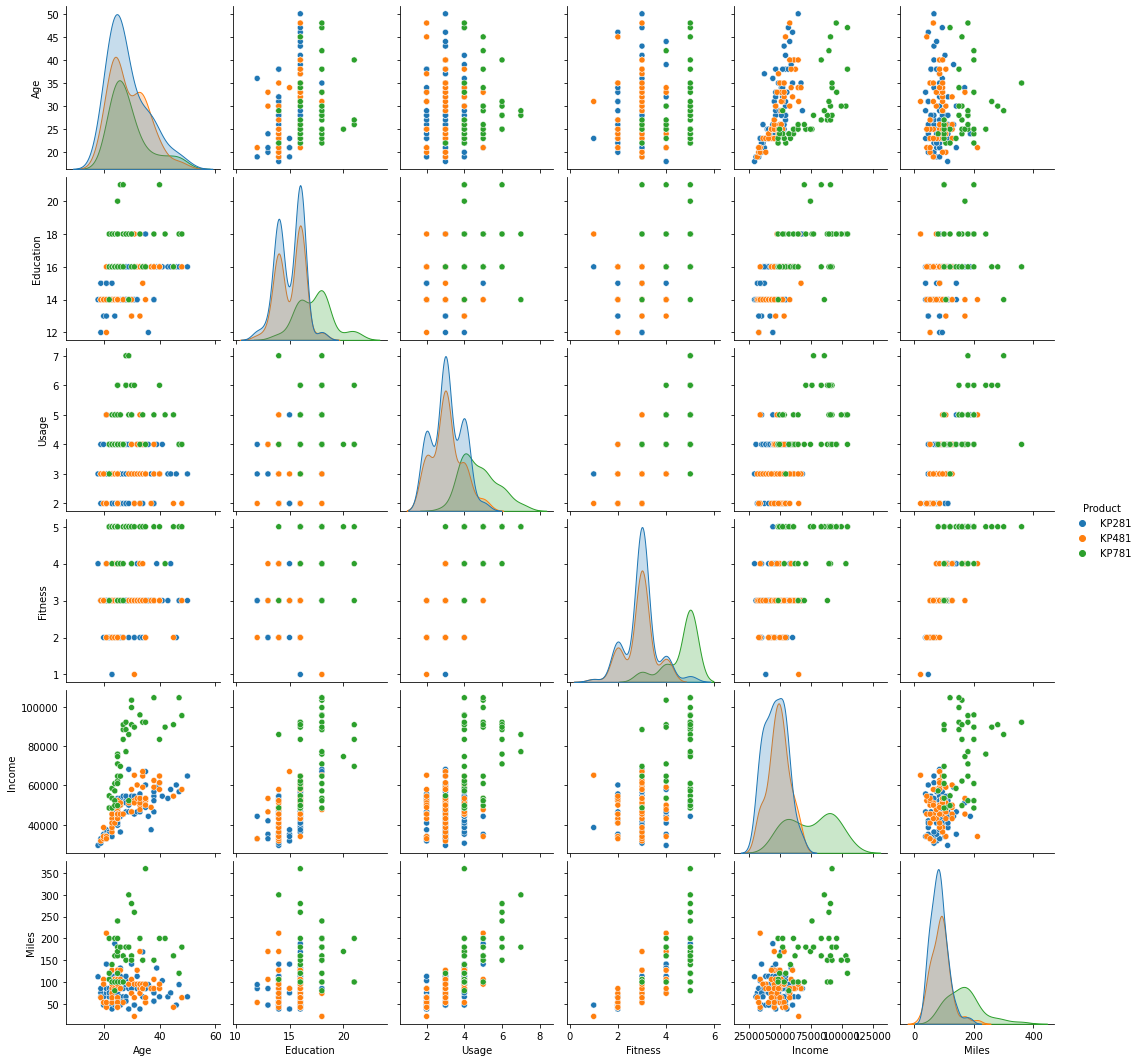

In [34]:
sns.pairplot(data=df, hue='Product')

In [35]:
for j in [2,3]:
    for i in itertools.combinations(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles'], j):
        if 'Product' in i:
            print(i)

('Product', 'Age')
('Product', 'Gender')
('Product', 'Education')
('Product', 'MaritalStatus')
('Product', 'Usage')
('Product', 'Fitness')
('Product', 'Income')
('Product', 'Miles')
('Product', 'Age', 'Gender')
('Product', 'Age', 'Education')
('Product', 'Age', 'MaritalStatus')
('Product', 'Age', 'Usage')
('Product', 'Age', 'Fitness')
('Product', 'Age', 'Income')
('Product', 'Age', 'Miles')
('Product', 'Gender', 'Education')
('Product', 'Gender', 'MaritalStatus')
('Product', 'Gender', 'Usage')
('Product', 'Gender', 'Fitness')
('Product', 'Gender', 'Income')
('Product', 'Gender', 'Miles')
('Product', 'Education', 'MaritalStatus')
('Product', 'Education', 'Usage')
('Product', 'Education', 'Fitness')
('Product', 'Education', 'Income')
('Product', 'Education', 'Miles')
('Product', 'MaritalStatus', 'Usage')
('Product', 'MaritalStatus', 'Fitness')
('Product', 'MaritalStatus', 'Income')
('Product', 'MaritalStatus', 'Miles')
('Product', 'Usage', 'Fitness')
('Product', 'Usage', 'Income')
('Prod

In [ ]:
flights = sns.load_dataset("flights")
print(flights)

flights = flights.pivot("month", "year", "passengers")
print(flights)

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]
year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   17